Imports

In [37]:
import pandas as pd

Access files from this path: "C:\Users\Daniel Price\Documents\Documents\Exeter\Data_Science_in_Economics\Empirical_Project\Data"

for each file, from 2000-01 to 2021-22 (inclusive), do the following:
Convert the csv file to a pandas dataframe
Since each year is the same data, but for a different year, we can concatenate the dataframes together.

In [38]:
import os
import pandas as pd
import re

# Function to parse dates adaptively
def parse_dates(dates):
    # Checking the year format based on length and adjusting accordingly
    if len(dates[0].split('/')[-1]) == 2:
        return pd.to_datetime(dates, format='%d/%m/%y')
    elif len(dates[0].split('/')[-1]) == 4:
        return pd.to_datetime(dates, format='%d/%m/%Y')
    else:
        # Fallback to infer the format if unexpected length
        return pd.to_datetime(dates, infer_datetime_format=True)

# Data directory
data = r"C:\Users\Daniel Price\Documents\Documents\Exeter\Data_Science_in_Economics\Empirical_Project\Data"

# Get the list of files in the data directory
file_list = os.listdir(data)

# Initialize an empty dataframe to store the concatenated data
concatenated_df = pd.DataFrame()

# Define the pattern for the file names
pattern = re.compile(r'^\d{4}-\d{2}\.csv$')

# Initialize a counter for the number of files converted
file_count = 0

# Iterate over each file
for file_name in file_list:
    # Check if the file matches the pattern for a CSV file
    if pattern.match(file_name):
        # Construct the file path
        file_path = os.path.join(data, file_name)
        
        # Read the CSV file into a dataframe, explicitly parsing the date
        df = pd.read_csv(file_path, parse_dates=['Date'], date_parser=parse_dates)
        
        # Concatenate the dataframe to the existing data
        concatenated_df = pd.concat([concatenated_df, df])

        # Increment the counter
        file_count += 1

# Print the concatenated dataframe
print(concatenated_df)

# Print the number of files converted
print(f"Number of files converted: {file_count}")


The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
The argument 'date_parser' is deprecated and will be removed in a future version

    Div       Date     HomeTeam        AwayTeam  FTHG  FTAG FTR  HTHG  HTAG  \
0    E0 2000-08-19     Charlton        Man City     4     0   H     2     0   
1    E0 2000-08-19      Chelsea        West Ham     4     2   H     1     0   
2    E0 2000-08-19     Coventry   Middlesbrough     1     3   A     1     1   
3    E0 2000-08-19        Derby     Southampton     2     2   D     1     2   
4    E0 2000-08-19        Leeds         Everton     2     0   H     2     0   
..   ..        ...          ...             ...   ...   ...  ..   ...   ...   
318  E0 2024-04-13  Bournemouth      Man United     2     2   D     2     1   
319  E0 2024-04-14    Liverpool  Crystal Palace     0     1   A     0     1   
320  E0 2024-04-14     West Ham          Fulham     0     2   A     0     1   
321  E0 2024-04-14      Arsenal     Aston Villa     0     2   A     0     0   
322  E0 2024-04-15      Chelsea         Everton     6     0   H     4     0   

    HTR  ...  AvgC<2.5  AHCh  B365CAHH  B365CAHA  P

The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
The argument 'date_parser' is deprecated and will be removed in a future version

VAR was implemented after in the 2019/20 season, so we will mark the data which had VAR with a 1, and the data which did not have VAR with a 0. We will make a new column called 'VAR' which will have this information.

In [39]:
# Convert 'Date' column to datetime format, handling unparseable dates by setting them as NaT
concatenated_df['Date'] = pd.to_datetime(concatenated_df['Date'], format='%d/%m/%Y', errors='coerce')

# Identify rows where the date conversion resulted in NaT
nat_dates = concatenated_df[concatenated_df['Date'].isna()]

# Print the count of NaT entries
print(f"Number of unparseable dates set as NaT: {nat_dates.shape[0]}")

# If there are any NaT values, print them out
if not nat_dates.empty:
    print("List of unparseable dates:")
    print(nat_dates['Date'])  # This will only show NaT, for actual date strings causing issues, you should print another column if available

# Define the date for VAR implementation
var_start_date = pd.Timestamp('2019-06-01')

# Add a 'VAR' column based on the year extracted from the 'date'. VAR implemented from 2019 onwards.
concatenated_df['VAR'] = concatenated_df['Date'].apply(lambda x: 1 if x >= var_start_date else 0)

# Print the concatenated dataframe with the new 'VAR' column
print(concatenated_df)

# Print the number of matches listed as having VAR
print(f"Number of matches listed as having VAR: {concatenated_df['VAR'].sum()}")

# Write the concatenated dataframe to a CSV file in the same directory as the datasets
data_path = 'your/directory/path'  # Adjust this to your correct path
concatenated_df.to_csv(os.path.join(data, 'combined_data.csv'), index=False)

Number of unparseable dates set as NaT: 0
    Div       Date     HomeTeam        AwayTeam  FTHG  FTAG FTR  HTHG  HTAG  \
0    E0 2000-08-19     Charlton        Man City     4     0   H     2     0   
1    E0 2000-08-19      Chelsea        West Ham     4     2   H     1     0   
2    E0 2000-08-19     Coventry   Middlesbrough     1     3   A     1     1   
3    E0 2000-08-19        Derby     Southampton     2     2   D     1     2   
4    E0 2000-08-19        Leeds         Everton     2     0   H     2     0   
..   ..        ...          ...             ...   ...   ...  ..   ...   ...   
318  E0 2024-04-13  Bournemouth      Man United     2     2   D     2     1   
319  E0 2024-04-14    Liverpool  Crystal Palace     0     1   A     0     1   
320  E0 2024-04-14     West Ham          Fulham     0     2   A     0     1   
321  E0 2024-04-14      Arsenal     Aston Villa     0     2   A     0     0   
322  E0 2024-04-15      Chelsea         Everton     6     0   H     4     0   

    HTR  

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


Check for columns with missing data

In [40]:
# Check for columns without NaN values
no_nan_columns = concatenated_df.columns[concatenated_df.notna().all()].tolist()

print("Columns without NaN values:", no_nan_columns)

Columns without NaN values: ['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF', 'AF', 'HY', 'AY', 'HR', 'AR', 'VAR']


Causal Forest
We will use the causal forest model to show the effects of VAR on the number of goals scored in a match.

In [41]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
# from econml.dml import CausalForestDML

# # Assuming 'concatenated_df' is your DataFrame and is already loaded
# # Preprocess Date column
# concatenated_df['Date'] = pd.to_datetime(concatenated_df['Date'])
# concatenated_df['Year'] = concatenated_df['Date'].dt.year
# concatenated_df['Month'] = concatenated_df['Date'].dt.month
# concatenated_df['Day'] = concatenated_df['Date'].dt.day

# # Selecting and preparing data
# features = ['Year', 'Month', 'Day', 'HTHG', 'HTAG',
#             'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 
#             'AY', 'HR', 'AR']
# X = concatenated_df[features]
# Y = concatenated_df['FTHG'] + concatenated_df['FTAG']
# T = concatenated_df['VAR']



# # Define and configure the causal forest model
# causal_forest = CausalForestDML(
#     model_y=GradientBoostingRegressor(),  # Model for the outcome
#     model_t=GradientBoostingClassifier(),  # Model for the treatment
#     discrete_treatment=True,
#     random_state=123
# )

# # Fit the causal forest model
# causal_forest.fit(Y=Y, T=T, X=X)

# # How much the total number of goals is expected to change due to VAR for each match
# effects = causal_forest.effect(X)
# print("Predicted effect of VAR on the total number of goals scored in the match: ", effects[:10])

# # Estimate of VAR's effect on goals scored in a match
# ate = np.mean(effects)
# print("Estimated effect of VAR on the total number of goals scored in the match: ", ate)


In [42]:
# # Convert effects to a DataFrame
# effects_df = pd.DataFrame(effects, columns=['VAR_Effect'])

# # Concatenate this DataFrame with the original match data DataFrame
# # Ensure that the indices align correctly
# concatenated_df['VAR_Effect'] = effects_df['VAR_Effect']

# # Now, you can see the VAR effect alongside all other match data
# print(concatenated_df[['Date', 'HomeTeam', 'AwayTeam', 'VAR_Effect']].head(10))


In [43]:
# #sorting to find matches with the highest VAR effects
# sorted_df = concatenated_df.sort_values(by='VAR_Effect', ascending=False)
# print(sorted_df[['Date', 'HomeTeam', 'AwayTeam', 'VAR_Effect']].head(10))

Second Causal Forest

In [44]:
import pandas as pd
from dowhy import CausalModel
from IPython.display import Image, display
from sklearn.model_selection import train_test_split
from econml.dml import CausalForestDML
from sklearn.linear_model import MultiTaskLassoCV
from sklearn.linear_model import LassoCV

# Assuming 'concatenated_df' is the DataFrame and is already loaded
# # Preprocess Date column
concatenated_df['Date'] = pd.to_datetime(concatenated_df['Date'])
concatenated_df['Year'] = concatenated_df['Date'].dt.year
concatenated_df['Month'] = concatenated_df['Date'].dt.month
concatenated_df['Day'] = concatenated_df['Date'].dt.day
# Add a new column for the total goals
concatenated_df['TotalGoals'] = concatenated_df['FTAG'] + concatenated_df['FTHG']


treatment = 'VAR'
outcome = 'TotalGoals'
covariates = ["Year", 'Month', 'Day', 'HTHG', 'HTAG', 'HS', 'AS', 'HST', 
              'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR']


# Drop missing data 
# Combine 'treatment' with 'outcome' and 'covariates' into one list
all_variables = [treatment] + [outcome] + covariates
concatenated_df = concatenated_df.dropna(axis=0, subset=all_variables)

# Split data into train and test sets 
train, test = train_test_split(concatenated_df, test_size=0.2)

# set variables for causal forest Y=outcome, T=treatment, X=covariates, W=effect_modifiers 
Y = train[outcome]
T = train[treatment]
X = train[covariates]
W = None
X_test = test[covariates]

# Update the model parameters for causal forest
causal_forest = CausalForestDML(
    criterion='het',
    n_estimators=10000,
    min_samples_leaf=10,
    max_depth=None,
    max_samples=0.5,
    discrete_treatment=False,
    honest=True,
    inference=True,
    cv=10,
    model_t=LassoCV(),
    model_y=LassoCV()   
)

print(Y.shape)  # Check if Y is indeed multi-dimensional (i.e., (n_samples, n_targets))#
Y = train[outcome]
print(Y.head())  # Quick check to see the first few rows of Y


                      
# fit train data to causal forest model 
causal_forest.fit(Y, T, X=X, W=W)
# estimate the CATE with the test set 
causal_forest.const_marginal_ate(X_test)


(7250,)
58     3
74     2
252    4
329    0
333    5
Name: TotalGoals, dtype: int64


DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, us

 95%|=================== | 6891/7250 [00:16<00:00]       

dict_keys(['TotalGoals'])
<class 'dict'>
dict_keys(['VAR'])


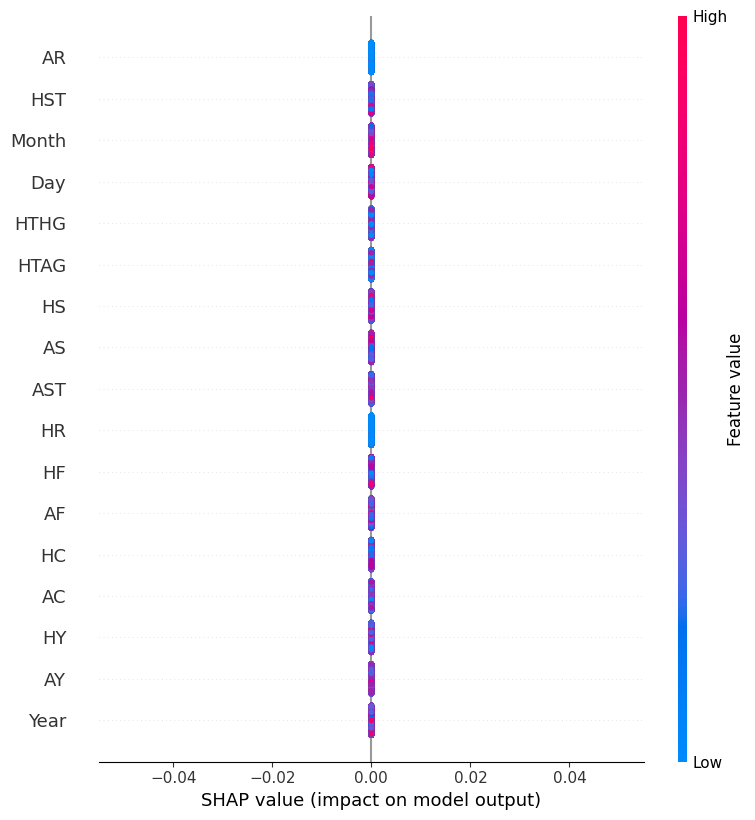

In [48]:
# code adapted from https://github.com/microsoft/EconML
import shap
from econml.dml import CausalForestDML
import matplotlib.pyplot as plt


# fit causal forest with default parameters 
causal_forest = CausalForestDML()
causal_forest.fit(Y, T, X=X, W=W)

# calculate shap values of causal forest model 
shap_values = causal_forest.shap_values(X)

# Print the keys in the SHAP values dictionary
print(shap_values.keys())

# Print the type and keys if it's a dictionary
print(type(shap_values['TotalGoals']))
if isinstance(shap_values['TotalGoals'], dict):
    print(shap_values['TotalGoals'].keys())


# plot shap values 
shap.summary_plot(shap_values['TotalGoals']['VAR'])